# Lab-2.1: Assignment
`Gathering text data with an API`

**NOTE**: It is recommended that you complete this `.ipynb` file in VS-code. 

`Submission:`

* Export the completed assignment to HTML or PDF (preferably with Quarto) and upload it to Canvas.
* The final uploaded version should NOT have any code-errors present
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

## Assignment-1: 

* Read over the `News-API`, `Wikipedia API`, and `Google Scholar` API sections in the lab-demonstration section, if you have not done so already. 
* Get an API key for the `News-API`: [see following link](https://newsapi.org/docs/get-started)
* **Submission**: Insert your API key below 

In [2]:
API_KEY='476857e2dbfe4997b0eae3e04631330d'

## Assignment-2: 

* Use the provided `News-API` code as a starting point 
* Select `THREE` random topics (e.g. Georgetown, Cats, Clouds) but choose whatever you like 
* Query the API to pull text data and store the results in three different dictionaries 
* Extract the `title` and `description` text and store for later processing (up to you how you do this)
* Clean the text as needed 

In [3]:
import requests

# Insert api key
API_KEY = '476857e2dbfe4997b0eae3e04631330d'

topics = ['NBA', 'Car', 'Climate Change']

# Dictionary to store results
results = {}

# Query for each topic
for topic in topics:
    url = f'https://newsapi.org/v2/everything?qInTitle={topic}&language=en&apiKey={API_KEY}'
    response = requests.get(url)
    data = response.json()
# Make sure 'articles' exists
if 'articles' in data:
    articles = data['articles']
# Extract the title and description
    results[topic] = [{
    'title': article['title'] if article['title'] else 'No title available',
    'description': article['description'] if article['description'] else 'No description available'
    } for article in articles]

# Results
for topic, articles in results.items():
    print(f"Topic: {topic}")
    for article in articles:
        print(f"Title: {article['title']}")
        print(f"Description: {article['description']}\n")

Topic: Climate Change
Title: The Multiple Ways Climate Change Threatens to Make Migraines Worse
Description: Migraine sufferers are often triggered by the weather, and research suggests warming temperatures and more extreme weather events worsen attacks.

Title: The United Nations Wants to Treat AI With the Same Urgency as Climate Change
Description: A UN report proposes that the organization take a much more active role in the monitoring and oversight of AI.

Title: How did volcanism trigger climate change before the eruptions started?
Description: New dating of a major ancient warming shows warming started before major eruptions.

Title: Can We Fight Climate Change By Bioengineering a Better Cow?
Description: One of Slashdot's most-visited stories of all time was the 2016 story asking: Can Cow Backpacks Reduce Global Methane Emissions?

"Enteric fermentation," or livestock's digestive process, accounts for 22 percent of all U.S. methane emissions, and the manure t…

Title: Droughts l

## Assignment-3: 

* Use the provided `Wikipedia-API` code as a starting point 
* Select `THREE` random topics (e.g. Georgetown, Cats, Clouds) but choose whatever you like 
* Query the API to pull text data and store the results locally
* For EACH `THREE` of the random topics, create a `word cloud` for your cleaned text 

In [4]:
import wikipediaapi

# Initialize Wikipedia API with a generic User-Agent
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent="DSAN5000_Lab_Project/1.0 (Data Science Project)"
)

# Topics to query
topics = ['NBA', 'Car', 'Climate Change']

# Dictionary to store results
wiki_results = {}

# Query Wikipedia for each topic
for topic in topics:
    page = wiki_wiki.page(topic)
    if page.exists():
        wiki_results[topic] = page.text
    else:
        wiki_results[topic] = "Page not found."

# Check the results
for topic, text in wiki_results.items():
    print(f"Topic: {topic}")
    print(f"Extracted Text: {text[:500]}...")  # Only show the first 500 characters


Topic: NBA
Extracted Text: The National Basketball Association (NBA) is a professional basketball league in North America composed of 30 teams (29 in the United States and 1 in Canada). It is one of the major professional sports leagues in the United States and Canada and is considered the premier professional basketball league in the world.
The NBA was created on August 3, 1949, with the merger of the Basketball Association of America (BAA) and the National Basketball League (NBL). The league later adopted the BAA's hist...
Topic: Car
Extracted Text: A car, or an automobile, is a motor vehicle with wheels. Most definitions of cars state that they run primarily on roads, seat one to eight people, have four wheels, and mainly transport people over cargo. There are around one billion cars in use worldwide. The car is considered an essential part of the developed economy.
The French inventor Nicolas-Joseph Cugnot built the first steam-powered road vehicle in 1769, while the Swiss inventor

In [11]:
import re

def clean_text(text):
    # Remove special characters and numbers, keep only letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()  
    return text

# Clean the text for each topic
cleaned_results = {topic: clean_text(text) for topic, text in wiki_results.items()}


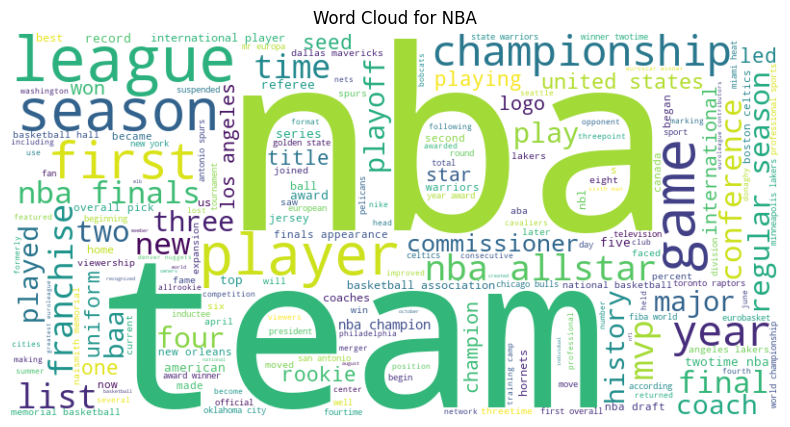

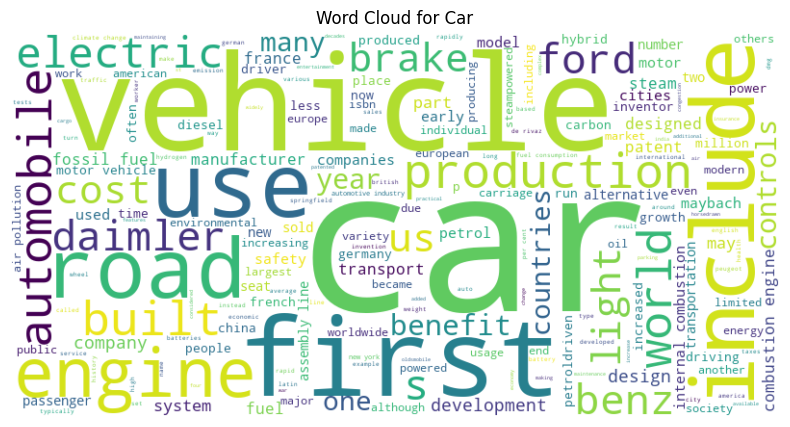

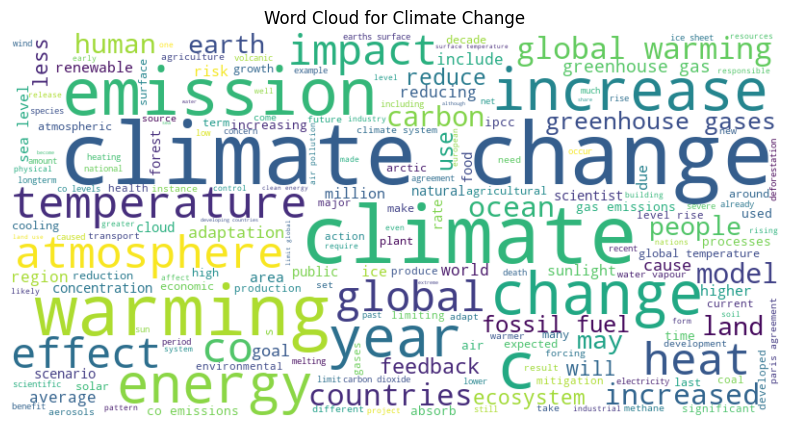

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for each topic
for topic, text in cleaned_results.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {topic}")
    plt.show()
